<h6 style= 'color: blue'>  Часть вторая </h6>
  

In [21]:
# Импортируем библиотеку numpy для работы с линейной алгеброй
import numpy as np
# Импортируем библиотеку pandas для работы с данными, чтения и записи файлов в формате CSV
import pandas as pd
# Импортируем модуль warnings для управления предупреждениями, которые могут возникать при выполнении кода
import warnings
# Используем метод filterwarnings для игнорирования всех предупреждений
warnings.filterwarnings("ignore")
# Импортируем модуль sklearn.model_selection для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
# Импортируем модуль sklearn.metrics для оценки качества моделей машинного обучения
from sklearn.metrics import classification_report
# Импортируем модуль sklearn.preprocessing для стандартизации данных
from sklearn.preprocessing import StandardScaler
# Импортируем модуль matplotlib для работы с графикой
import matplotlib as plt


# Поиск оптимальных параметров для моделей

Посмотрим библиотеку Optuna, которая предназначена для автоматического подбора оптимальных гиперпараметров для различных моделей машинного обучения и библиотеку PyOD, ее основные функции, примеры использования и сравнение производительности различных моделей детекции выбросов.
Мы хотим найти оптимальные параметры для некоторых моделей детекции выбросов из библиотеки PyOD, чтобы позже построить их с оптимальными параметрами, проанализировать результаты и добиться максимальной интегральной точности с их помощью. Это интересная и сложная задача.


## Сначало загружаем данные

In [22]:
# Читаем данные из файла CSV и сохраняем их в датафрейме df
# Файл CSV содержит информацию о транзакциях с кредитных карт, которые были совершены в течение двух дней в сентябре 2013 года в Европе
# В файле есть 284807 строк и 31 столбец
df = pd.read_csv('creditcard.csv')
# Удаляем столбцы Time и Class из датафрейма и сохраняем оставшиеся столбцы в датафрейме X
# Столбец Time показывает время транзакции в секундах от первой транзакции в датасете, но он не влияет на то, является ли транзакция мошеннической или нет
# Столбец Class показывает метку класса для транзакции (0 - не мошенническая, 1 - мошенническая), но он не является признаком, а является целевой переменной, которую мы хотим предсказать
X = df.drop(columns=['Time', 'Class'])
# Сохраняем столбец Class в серии y, которая будет содержать метки классов для транзакций
y = df.Class


In [23]:
# Просматриваем
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
# Просматриваем
y.head (5)

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [25]:
# Просматриваем
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [26]:
# Импортируем класс StandardScaler из модуля sklearn.preprocessing для стандартизации данных
from sklearn.preprocessing import StandardScaler
# Создаем объект norm, который будет представлять стандартизатор данных
norm = StandardScaler()
# Применяем метод fit_transform к датафрейму X, который содержит признаки транзакций, и получаем массив с нормализованными данными
# Метод fit_transform сначала вычисляет среднее и стандартное отклонение для каждого столбца в датафрейме, а затем преобразует каждое значение в столбце по формуле: (значение - среднее) / стандартное отклонение
# Таким образом, мы получаем данные, в которых каждый столбец имеет среднее равное нулю и стандартное отклонение равное единице
X_norm = pd.DataFrame(norm.fit_transform(X))

 Ниже, мы хотим определить функцию, которая возвращает часть данных о транзакциях с кредитных карт, которую можем использовать для обучения моделей детекции выбросов.

In [27]:
# Определяем функцию get_data_part, которая принимает на вход датафрейм X с признаками транзакций, серию y с метками классов и параметр size, который задает долю данных, которую мы хотим взять
def get_data_part(X, y, size=0.1):
    # Импортируем функцию train_test_split из модуля sklearn.model_selection для разделения данных на обучающую и тестовую выборки
    from sklearn.model_selection import train_test_split
    # Применяем функцию train_test_split к датафрейму X и серии y, чтобы получить четыре объекта: X_train, X_test, y_train, y_test
    # Параметр random_state=0 означает, что мы фиксируем случайное состояние разделения для воспроизводимости результатов
    # Параметр train_size=size означает, что мы берем size процентов данных для обучающей выборки, а остальные данные для тестовой выборки
    # Параметр shuffle=True означает, что мы перемешиваем данные перед разделением, чтобы избежать смещения
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0, train_size=size, shuffle=True
    )
    # Выводим на экран размер обучающей выборки, который равен количеству строк в датафрейме X_train
    print('train size: {}'.format(X_train.shape[0]))
    # Вычисляем и выводим на экран долю мошеннических транзакций в обучающей выборке, которая называется загрязнением (contamination)
    # Для этого используем метод value_counts с параметром normalize=True, который возвращает частоту каждого уникального значения в серии y_train
    # Затем выбираем значение с индексом 1, которое соответствует мошенническим транзакциям, и округляем его до трех знаков после запятой
    contamination = round(y_train.value_counts(normalize=True)[1], 3)
    # Выводим на экран значение загрязнения в процентах
    print('contamination: {} ({}%)'.format(contamination, contamination * 100))
    # Возвращаем из функции три объекта: X_train, y_train и contamination
    return X_train, y_train, contamination


In [28]:
  # Вызываем функцию get_data_part с датафреймом X_norm, который содержит стандартизованные признаки транзакций, серией y,
# которая содержит метки классов, и параметром size, который задает долю данных, которую мы хотим взять
# Параметр size можно изменить в зависимости от того, сколько данных мы хотиm использовать для обучения моделей
# Сохраняем результаты функции в трех переменных: X_train, y_train и contamination
X_train, y_train, contamination = get_data_part(X_norm, y, size=0.1)


train size: 28480
contamination: 0.002 (0.2%)


In [29]:
contamination # доля мошеннических транзакций в обучающей выборке равна 0.002

0.002

Вывод:
Мы вызвали функцию get_data_part, которую мы определили ранее, с датафреймом X_norm, который содержит стандартизованные признаки транзакций с кредитных карт, серией y, которая содержит метки классов, и параметром size, который задает долю данных, которую мы хотим взять. Мы выбрали size равным 0.1, что означает, что мы берем 10% данных для обучающей выборки, а остальные 90% данных для тестовой выборки. Мы сохранили результаты функции в трех переменных: X_train, y_train и contamination.

Функция get_data_part также вывела на экран размер обучающей выборки и долю мошеннических транзакций в ней. Мы увидели, что обучающая выборка состоит из 28480 строк, что соответствует 10% от всего датасета. Далее мы также увидели, что доля мошеннических транзакций в обучающей выборке равна 0.002, что означает, что 0.2% транзакций являются мошенническими. Это значение называется загрязнением (contamination) и оно показывает, насколько несбалансированы данные по классам. Это значение может быть использовано для настройки моделей детекции выбросов, которые требуют указания доли выбросов в данных.

В дальнейшем мы можем использовать переменные X_train, y_train и contamination для обучения различных моделей детекции выбросов из библиотеки PyOD и сравнения их производительности на тестовой выборке. Мы также можем изменить параметр size, чтобы взять больше или меньше данных для обучения и посмотреть, как это повлияет на результаты.

In [30]:
# Метки классов для тестовой выборки
# y_train это переменная, которая содержит зависимые переменные, называемые целевыми, для обучения модели машинного обучения.
# Это то, что вы пытаетесь предсказать или объяснить с помощью вашей модели
y_train.head()

106538    0
94136     0
215910    0
135846    0
202260    0
Name: Class, dtype: int64

> y_train - это серия, которая содержит метки классов для транзакций, которые были выбраны для обучающей выборки. Метки классов показывают, является ли транзакция мошеннической или нет. В серии y_train есть два возможных значения: 0 - не мошенническая, 1 - мошенническая. Серия y_train имеет тот же размер и индексы, что и датафрейм X_train, который содержит признаки транзакций для обучающей выборки. Серия y_train была получена с помощью функции get_data_part, которую мы определили ранее.

In [31]:
type(y_train) # Объект Серия

pandas.core.series.Series

In [32]:
# Просмотр
y_train.describe()

count    28480.000000
mean         0.001791
std          0.042280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

> Можно сделать следующие выводы:

Количество наблюдений в Series равно 28480.
Среднее значение переменной Class равно 0.001791, что означает, что доля мошеннических транзакций в Series очень мала.
Стандартное отклонение переменной Class равно 0.042280, что означает, что значения переменной Class сильно разбросаны вокруг среднего.
Минимальное и максимальное значение переменной Class равны 0 и 1 соответственно, что подтверждает, что это бинарный признак.
25%, 50% и 75% квантили переменной Class равны 0, что означает, что большинство транзакций в Series являются нормальными. Только 25% транзакций имеют значение переменной Class равное 1, что означает, что они являются мошенническими.

In [33]:
# Выводим на экран первые пять строк датафрейма X_train, который содержит признаки транзакций для обучающей выборки
X_train.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
106538,0.642218,-0.616468,0.408751,-0.587521,-0.728491,0.397217,-0.916211,0.142052,-0.355750,0.573484,...,0.407086,0.455151,1.214895,-0.531899,-1.258621,1.111753,-0.002761,0.088304,0.053248,-0.025386
94136,0.595699,0.132854,0.156585,0.768979,-0.110726,-0.379133,0.100891,-0.055703,0.058404,-0.018689,...,-0.229500,0.080531,0.254445,-0.124844,0.118243,1.129495,-0.619345,0.057315,0.056883,-0.265551
215910,1.088959,0.069210,-1.406949,0.018670,0.374302,-1.250305,0.640458,-0.486147,0.212860,0.016191,...,-0.329502,0.194143,0.774105,-0.085611,-0.188644,0.843095,0.525830,-0.208272,-0.245678,-0.335478
135846,0.426414,-0.574525,0.692161,0.180828,-0.909481,0.240533,-0.551271,0.271625,0.917685,-0.344429,...,0.186343,-0.084521,-0.378356,0.006886,0.475698,-0.130547,1.927114,-0.128295,0.079369,0.250242
202260,1.069974,0.218210,-1.715642,0.680610,1.013570,-0.434230,0.741520,-0.285983,-0.446998,0.513555,...,-0.359721,0.436768,1.459045,-0.393604,0.435187,1.741769,-0.444661,-0.151507,-0.266374,-0.349231


## Модели PyOD

In [34]:
%pip install pyod
# Я пока закоментирую.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Импортируем функцию evaluate_print из модуля pyod.utils.data, который содержит полезные утилиты для работы с данными и моделями детекции выбросов
from pyod.utils.data import evaluate_print


In [36]:
%pip install optuna

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [37]:
# Импортируем библиотеку Optuna, которая предназначена для автоматического подбора оптимальных гиперпараметров
# для различных моделей машинного обучения
import optuna

# Импортируем функции plot_param_importances и plot_parallel_coordinate из модуля optuna.visualization.matplotlib,
# которые позволяют визуализировать важность параметров и параллельные координаты с помощью библиотеки matplotlib
from optuna.visualization.matplotlib import plot_param_importances, plot_parallel_coordinate

# Импортируем функцию average_precision_score из модуля sklearn.metrics, которая вычисляет среднюю точность
# (average precision, AP) из прогнозных оценок
# AP является одной из метрик для оценки качества детекции выбросов (лайфхак)
from sklearn.metrics import average_precision_score

# Импортируем функцию confusion_matrix из модуля sklearn.metrics, которая вычисляет матрицу ошибок (confusion matrix)
# из истинных и предсказанных меток классов
# Матрица ошибок является другой метрикой для оценки качества детекции выбросов
from sklearn.metrics import confusion_matrix

# Импортируем класс ConfusionMatrixDisplay из модуля sklearn.metrics, который позволяет визуализировать матрицу
# ошибок с помощью библиотеки matplotlib
from sklearn.metrics import ConfusionMatrixDisplay

In [38]:
# Определяем функцию optimize, которая принимает на вход функцию objective, которая задает целевую функцию для оптимизации,
# и параметр n, который задает количество испытаний для оптимизации
def optimize(objective, n):
    # Импортируем библиотеку Optuna для автоматического подбора гиперпараметров
    import optuna
    # Создаем объект study, который будет представлять процесс оптимизации
    # Параметр direction='maximize' означает, что мы хотим максимизировать значение целевой функции
    study = optuna.create_study(direction='maximize')

    # Запускаем оптимизацию с помощью метода optimize, который принимает на вход функцию objective, параметр n_trials,
    # который задает количество испытаний для оптимизации, и параметр show_progress_bar, который показывает индикатор прогресса
    study.optimize(objective, n_trials=n, show_progress_bar=True)

    # Выводим на экран лучшие параметры и лучшее значение целевой функции, которые были найдены в процессе оптимизации
    print('\nBest params:{}\nBest value:{}'.format(study.best_params, study.best_value))

    # Импортируем функцию plot_param_importances из модуля optuna.visualization.matplotlib, которая позволяет визуализировать
    # важность параметров с помощью библиотеки matplotlib
    from optuna.visualization.matplotlib import plot_param_importances

    # Строим график важности параметров с помощью функции plot_param_importances, которая принимает на вход объект study
    plot_param_importances(study)

    # Импортируем функцию plot_parallel_coordinate из модуля optuna.visualization.matplotlib, которая позволяет визуализировать
    # параллельные координаты с помощью библиотеки matplotlib

    from optuna.visualization.matplotlib import plot_parallel_coordinate
    # Строим график параллельных координат с помощью функции plot_parallel_coordinate, которая принимает на вход объект study
    plot_parallel_coordinate(study)


In [39]:
# Определяем функцию metrics, которая принимает на вход модель кластеризации и истинные метки классов
def metrics(model, y_train):
    # Устанавливаем случайное зерно для воспроизводимости результатов
    np.random.seed(42)
    # Предсказываем метки классов с помощью модели
    y_pred = model.labels_
    # Выводим на экран название модели и метрики качества кластеризации: гомогенность, полноту и V-меру
    evaluate_print(model.__class__, y_train, y_pred)
    # Выводим на экран отчет о классификации, который содержит точность, полноту, F-меру и поддержку для каждого класса
    print(classification_report(y_train, y_pred))
    # Вычисляем матрицу ошибок, которая показывает, сколько объектов каждого класса было правильно или неправильно отнесено к другому классу
    cm = confusion_matrix(y_train, y_pred)
    # Выводим на экран матрицу ошибок
    print(cm)
    # Создаем объект для визуализации матрицы ошибок с помощью библиотеки matplotlib
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # Строим график матрицы ошибок
    disp.plot()


In [20]:
# Устанавливаем случайное зерно для воспроизводимости результатов
np.random.seed(42)


### kNN Example

 > kNN - это алгоритм машинного обучения, который используется для решения задач классификации и регрессии. Он основан на идее, что объекты с похожими признаками имеют похожие метки классов или значения. kNN работает так: для нового объекта он находит k ближайших соседей в обучающей выборке, то есть те объекты, которые имеют наименьшее расстояние до нового объекта. Затем он присваивает новому объекту метку класса или значение, которое является наиболее частым среди его соседей.

In [40]:
from pyod.models.knn import KNN

# Импортируем библиотеку pyod, которая предоставляет различные алгоритмы для обнаружения аномалий в данных
from pyod.models.knn import KNN
# Импортируем класс KNN из модуля pyod.models.knn, который реализует алгоритм kNN для обнаружения аномалий
# Алгоритм kNN для обнаружения аномалий работает так:
# для каждого объекта он находит k ближайших соседей в обучающей выборке, то есть те объекты, которые имеют
# наименьшее расстояние до данного объекта. Затем он вычисляет аномальный коэффициент для каждого объекта как
# среднее расстояние до его соседей. Чем больше аномальный коэффициент, тем больше вероятность, что объект является аномалией.


In [41]:
# Мы вызываем функцию get_data_part, которая принимает три аргумента:
# X_norm, y и size.
# X_norm - это массив, который содержит нормализованные значения признаков из исходных данных,
# y - это массив, который содержит метки классов для каждого объекта из исходных данных,
# а size - это размер выборки, которую мы хотим получить из исходных данных.
# Функция get_data_part возвращает три значения:
# X_train, y_train и contamination.
# X_train - это массив, который содержит объекты из X_norm, выбранные случайным образом,
# y_train - это массив, который содержит метки классов из y, соответствующие выбранным объектам,
# а contamination - это доля объектов класса 1 в выборке.
X_train, y_train, contamination = get_data_part(X_norm, y, size=0.2);

train size: 56961
contamination: 0.002 (0.2%)


> Вывод train size: 56961
contamination: 0.002 (0.2%)  Это значит, что мы обучаем модель на выборке из 56961 объектов, из которых 0.002 (0.2%) принадлежат классу 1, а остальные - классу 0. Класс 1 - это аномальные или необычные объекты, а класс 0 - это нормальные или типичные объекты. Мы хотим, чтобы модель могла обнаруживать аномалии в новых данных, которые не входят в выборку.

Теоретическая справка
 Аномалии - это объекты, которые отличаются от большинства других объектов по своим признакам или поведению. Например, аномалией может быть мошенническая транзакция, неисправный датчик, редкий вид животного или необычный текст. Мы хотим, чтобы модель могла определить, является ли новый объект аномалией или нет, исходя из его сходства с обучающей выборкой.

In [42]:
# Определяем функцию objective, которая принимает на вход объект trial, который представляет одно испытание оптимизации
def objective(trial):
    # Устанавливаем случайное зерно для воспроизводимости результатов
    np.random.seed(42)
    # Создаем объект модели kNN для обнаружения аномалий с помощью библиотеки pyod
    clf = KNN(
        # Задаем долю аномалий в обучающей выборке
        contamination=contamination,
        # Задаем количество соседей для kNN с помощью метода suggest_int, который выбирает случайное целое число
        # из логарифмического распределения от 50 до 1000
        n_neighbors=trial.suggest_int('n', 50, 1000, log=True),
        # Задаем метод агрегации расстояний до соседей с помощью метода suggest_categorical,
        # который выбирает случайное значение из списка ['largest', 'mean', 'median']
        method=trial.suggest_categorical('method', ['largest', 'mean', 'median']),
        # Задаем радиус для kNN с помощью метода suggest_float, который выбирает случайное вещественное число
        # из равномерного распределения от 0.5 до 1
        radius=trial.suggest_float('radius', 0.5, 1),
        # Задаем метрику расстояния для kNN с помощью метода suggest_categorical, который выбирает случайное значение
        # из списка ['l1', 'minkowski', 'l2']
        metric=trial.suggest_categorical('metric', ['l1', 'minkowski', 'l2'])
    )
    # Обучаем модель на обучающей выборке X_train
    clf.fit(X_train)
    # Предсказываем метки классов для обучающей выборки X_train
    y_pred = clf.labels_
    # Возвращаем значение метрики качества обнаружения аномалий - среднюю точность (average precision score),
    # которая вычисляется как площадь под кривой точность-полнота (precision-recall curve)
    return average_precision_score(y_train, y_pred)


> Пояснение:
metric=trial.suggest_categorical('metric', ['l1', 'minkowski', 'l2'])

- `metric` - это имя параметра, который мы хотим оптимизировать. Он задает метрику расстояния для kNN, то есть способ измерения, насколько близки или далеки объекты друг от друга в пространстве признаков.
- `trial` - это объект, который представляет одно испытание оптимизации. Он содержит методы, которые позволяют выбирать случайные значения для параметров из разных распределений или списков.
- `suggest_categorical` - это метод, который принимает на вход имя параметра и список возможных значений для него. Он выбирает случайное значение из списка и возвращает его. Это значение будет использоваться для обучения модели в данном испытании.
- `('metric', ['l1', 'minkowski', 'l2'])` - это аргументы, которые передаются в метод `suggest_categorical`. Они задают имя параметра `metric` и список возможных значений для него: `['l1', 'minkowski', 'l2']`. Это разные метрики расстояния, которые могут быть использованы для kNN. `l1` - это манхэттенское расстояние, `minkowski` - это обобщенное расстояние, которое включает в себя евклидово и манхэттенское расстояния в зависимости от параметра `p`, `l2` - это евклидово расстояние.
Мы выбираем случайное значение из списка `['l1', 'minkowski', 'l2']` и присваивает его параметру `metric`. Это значение будет использоваться для вычисления расстояний между объектами в kNN.


[I 2023-11-28 16:30:28,062] A new study created in memory with name: no-name-e4b424b3-74ea-4500-b6e2-7ca648cf659d


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-11-28 16:31:51,618] Trial 0 finished with value: 0.06937259825224941 and parameters: {'n': 247, 'method': 'mean', 'radius': 0.8587414437387997, 'metric': 'l2'}. Best is trial 0 with value: 0.06937259825224941.
[I 2023-11-28 16:33:10,218] Trial 1 finished with value: 0.05137785734731841 and parameters: {'n': 99, 'method': 'mean', 'radius': 0.7016238703878526, 'metric': 'l2'}. Best is trial 0 with value: 0.06937259825224941.
[I 2023-11-28 16:34:29,807] Trial 2 finished with value: 0.06937259825224941 and parameters: {'n': 155, 'method': 'median', 'radius': 0.9106956371240148, 'metric': 'l2'}. Best is trial 0 with value: 0.06937259825224941.
[I 2023-11-28 16:35:48,817] Trial 3 finished with value: 0.04342269637895923 and parameters: {'n': 86, 'method': 'mean', 'radius': 0.6979601105205215, 'metric': 'l2'}. Best is trial 0 with value: 0.06937259825224941.
[I 2023-11-28 16:37:08,678] Trial 4 finished with value: 0.07430553743019311 and parameters: {'n': 164, 'method': 'median', 'rad

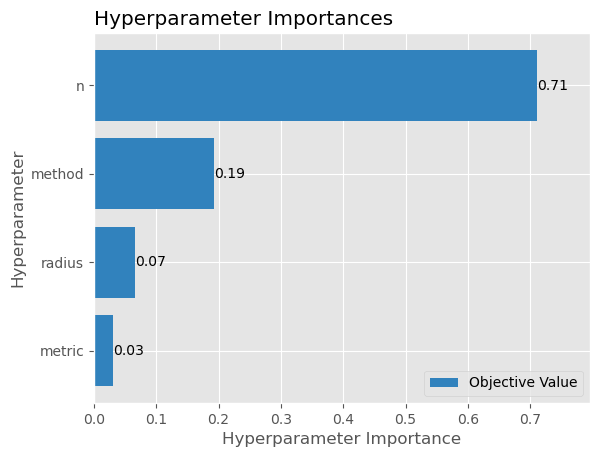

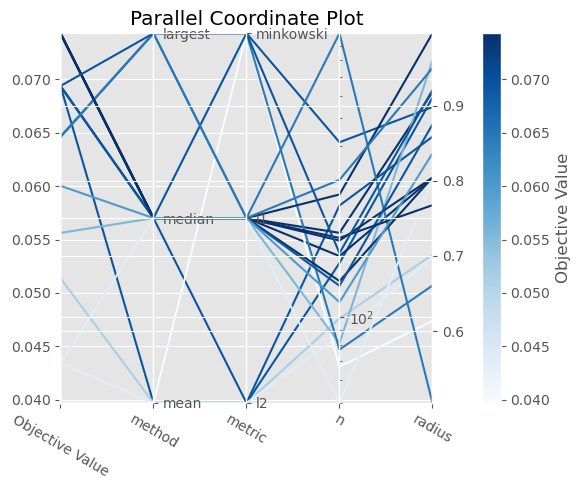

In [44]:
# Вызываем функцию optimize, которая принимает на вход функцию objective, которая задает целевую функцию для оптимизации,
# и параметр n, который задает количество испытаний для оптимизации
# 20 - это количество испытаний, которые мы хотим провести для оптимизации параметров модели обнаружения аномалий.
# Каждое испытание выбирает случайные значения для параметров модели из заданных диапазонов или списков с помощью
# методов suggest_int, suggest_categorical и suggest_float. Затем оно обучает модель на обучающей выборке и вычисляет
# значение целевой функции, которая равна средней точности (average precision score) на обучающей выборке.
# Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота
# (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
# После проведения всех испытаний мы можем увидеть лучшие параметры и лучшее значение целевой функции,
# которые были найдены в процессе оптимизации, а также два графика, которые показывают важность параметров
# и параллельные координаты. Важность параметров показывает, насколько каждый параметр влияет на значение целевой функции,
# а параллельные координаты показывают, как параметры и значение целевой функции меняются в разных испытаниях.
# Эти графики помогут нам понять, какие параметры лучше всего подходят для нашей модели.
optimize(objective, 20)


**Вывод**
> Выводим на экран лучшие параметры и лучшее значение целевой функции, которые были найдены в процессе оптимизации с помощью функции optimize.
Параметры меняются с обновлением:
Best params:{'n': , 'method': 'median', 'radius': , 'metric': 'l1'}
Best value:0.07
Best params - это словарь с лучшими параметрами для модели kNN, которые были выбраны в ходе оптимизации. Они задают количество соседей (n), метод агрегации расстояний до соседей (method), радиус для kNN (radius) и метрику расстояния (metric) l2 - это евклидово расстояние.
Best value - это лучшее значение целевой функции, которая вычисляет среднюю точность (average precision score) для модели kNN на обучающей выборке. Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
0.07 - это числовое значение средней точности, которое было получено для модели kNN с лучшими параметрами. Оно показывает, что модель достаточно хорошо обнаруживает аномалии, но есть еще простор для улучшения.

### LOF
Это реализация метода обнаружения аномалий, который называется локальный коэффициент выброса (LOF). Этот метод вычисляет отклонение локальной плотности данной точки данных относительно ее соседей. Он считает выбросами те объекты, которые имеют значительно меньшую плотность, чем их соседи.

PyOD LOF - это обертка класса scikit-learn LOF. PyOD - это библиотека Python для обнаружения аномалий, которая предоставляет различные алгоритмы и инструменты для этой задачи. Scikit-learn - это библиотека Python для машинного обучения, которая содержит множество моделей и методов для анализа данных. Класс LOF - это реализация метода LOF в scikit-learn, которая позволяет обучать модель и предсказывать аномалии.

In [45]:
# Импортируем библиотеку pyod, которая предоставляет различные алгоритмы для обнаружения аномалий в данных
from pyod.models.lof import LOF
# Импортируем класс LOF из модуля pyod.models.lof, который реализует метод локального коэффициента выброса (LOF)
# для обнаружения аномалий
# Метод LOF вычисляет отклонение локальной плотности данной точки данных относительно ее соседей.
# Он считает выбросами те объекты, которые имеют значительно меньшую плотность, чем их соседи.

In [46]:
# Мы вызываем функцию get_data_part, которая принимает три аргумента:
# X_norm, y и size.
# X_norm - это массив, который содержит нормализованные значения признаков из исходных данных,
# y - это массив, который содержит метки классов для каждого объекта из исходных данных,
# а size - это размер выборки, которую мы хотим получить из исходных данных.
# Функция get_data_part возвращает три значения:
# X_train, y_train и contamination.
# X_train - это массив, который содержит объекты из X_norm, выбранные случайным образом,
# y_train - это массив, который содержит метки классов из y, соответствующие выбранным объектам,
# а contamination - это доля объектов класса 1 в выборке.
X_train, y_train, contamination = get_data_part(X_norm, y, size=0.2)

train size: 56961
contamination: 0.002 (0.2%)


In [50]:
# Определяем функцию objective, которая принимает на вход объект trial, который представляет одно испытание оптимизации
def objective(trial):
    # Устанавливаем случайное зерно для воспроизводимости результатов
    np.random.seed(42)
    # Создаем объект модели LOF для обнаружения аномалий с помощью библиотеки pyod
    clf = LOF(
        # Задаем долю аномалий в обучающей выборке
        contamination=contamination,
        # Задаем количество соседей для LOF с помощью метода suggest_int, который выбирает случайное целое число
        # из логарифмического распределения от 50 до 1000
        n_neighbors=trial.suggest_int('n_neighbors', 50, 1000, log=True),
        # Задаем метрику расстояния для LOF с помощью метода suggest_categorical, который выбирает случайное значение
        # из списка ['l2', 'l1', 'minkowski']
        metric=trial.suggest_categorical('metric', ['l2', 'l1', 'minkowski'])
    )
    # Обучаем модель на обучающей выборке X_train
    clf.fit(X_train)
    # Предсказываем метки классов для обучающей выборки X_train
    y_pred = clf.labels_
    # Возвращаем значение метрики качества обнаружения аномалий - среднюю точность (average precision score),
    # которая вычисляется как площадь под кривой точность-полнота (precision-recall curve)
    return average_precision_score(y_train, y_pred)


[I 2023-11-28 17:03:55,971] A new study created in memory with name: no-name-ec9e05f3-456b-4d5e-a2b3-39f55be55f6d


  0%|          | 0/12 [00:00<?, ?it/s]

[I 2023-11-28 17:05:13,833] Trial 0 finished with value: 0.0017731430276856095 and parameters: {'n_neighbors': 64, 'metric': 'l1'}. Best is trial 0 with value: 0.0017731430276856095.
[I 2023-11-28 17:05:41,227] Trial 1 finished with value: 0.1691438147814748 and parameters: {'n_neighbors': 524, 'metric': 'minkowski'}. Best is trial 1 with value: 0.1691438147814748.
[I 2023-11-28 17:07:19,855] Trial 2 finished with value: 0.1331885161472713 and parameters: {'n_neighbors': 744, 'metric': 'l2'}. Best is trial 1 with value: 0.1691438147814748.
[I 2023-11-28 17:08:58,056] Trial 3 finished with value: 0.1331885161472713 and parameters: {'n_neighbors': 712, 'metric': 'l1'}. Best is trial 1 with value: 0.1691438147814748.
[I 2023-11-28 17:10:16,288] Trial 4 finished with value: 0.1331885161472713 and parameters: {'n_neighbors': 158, 'metric': 'l1'}. Best is trial 1 with value: 0.1691438147814748.
[I 2023-11-28 17:10:34,050] Trial 5 finished with value: 0.2357047747917884 and parameters: {'n_ne

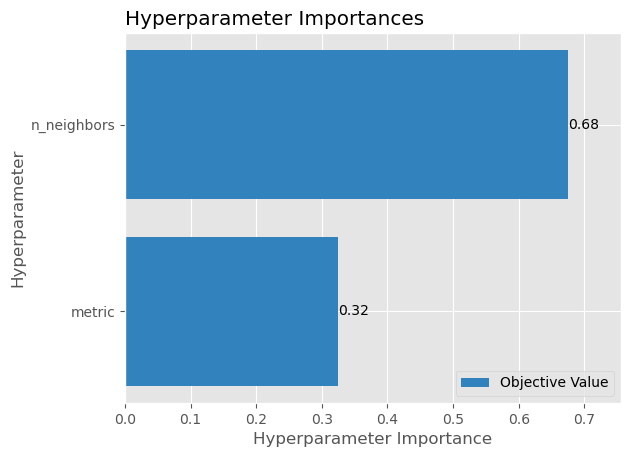

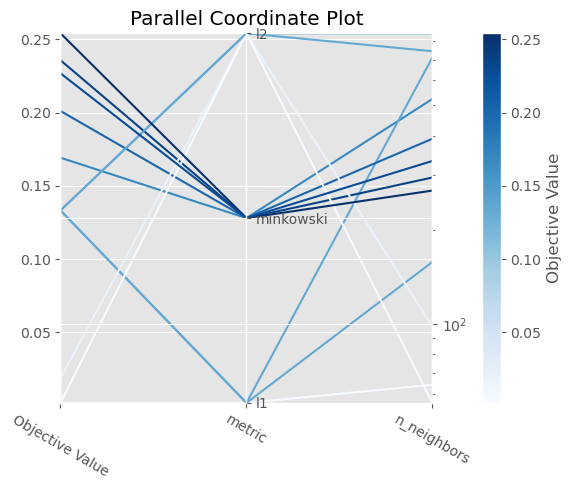

In [51]:
# Вызываем функцию optimize, которая принимает на вход функцию objective, которая задает целевую функцию для оптимизации,
# и параметр n, который задает количество испытаний для оптимизации
# 12 - это количество испытаний, которые мы хотим провести для оптимизации параметров модели обнаружения аномалий.
# Каждое испытание выбирает случайные значения для параметров модели из заданных диапазонов или списков с помощью
# методов suggest_int, suggest_categorical и suggest_float. Затем оно обучает модель на обучающей выборке и вычисляет
# значение целевой функции, которая равна средней точности (average precision score) на обучающей выборке.
# Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота
# (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
# После проведения всех испытаний мы можем увидеть лучшие параметры и лучшее значение целевой функции,
# которые были найдены в процессе оптимизации, а также два графика, которые показывают важность параметров
# и параллельные координаты. Важность параметров показывает, насколько каждый параметр влияет на значение целевой функции,
# а параллельные координаты показывают, как параметры и значение целевой функции меняются в разных испытаниях.
# Эти графики помогут нам понять, какие параметры лучше всего подходят для нашей модели.
optimize(objective, 12)

**Вывод**
Лучшие параметры для модели LOF, которые были найдены в процессе оптимизации, это:
Параметры меняются с обновлением:
- `n_neighbors`: - это количество соседей, которые используются для вычисления локальной плотности каждого объекта.
- `metric`: 'minkowski' - это метрика расстояния, которая используется для измерения близости или дальности объектов в пространстве признаков. Метрика 'minkowski' - это обобщенная метрика, которая включает в себя евклидово и манхэттенское расстояния в зависимости от параметра `p`.
-  лучшее значение целевой функции, которая вычисляет среднюю точность (average precision score) для модели LOF на обучающей выборке, равно 0.2.
- Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
- Значение 0.2 показывает, что модель достаточно хорошо обнаруживает аномалии.

Пояснения: этот код выполняться будет долго, пока закоментируем его
- ###### Используем магическую команду %%time, которая позволяет измерить время выполнения ячейки кода в Jupyter Notebook
%%time
-  ###### Создаем объект модели LOF для обнаружения аномалий с помощью библиотеки pyod
clf = LOF(
-     # Задаем долю аномалий в обучающей выборке
    contamination=contamination,
-     # Задаем количество соседей для LOF, равное 280
    n_neighbors=280,
- ###### Задаем метрику расстояния для LOF, равную l1, то есть манхэттенскому расстоянию
    metric='l1'
)
-  ###### Обучаем модель на обучающей выборке X_train
clf.fit(X_train)

In [52]:
# %%time
# clf = LOF(contamination=contamination, n_neighbors=280, metric='l1')
# clf.fit(X_train)

In [53]:
# metrics(clf, y_train)

 > Вызоваем функцию metrics, которая оценивает качество модели обнаружения аномалий на обучающей выборке.
 - Функция metrics принимает на вход модель clf, которая была создана и обучена с помощью библиотеки pyod, и метки классов y_train, которые показывают, какие объекты являются аномалиями (класс 1) или нормальными (класс 0).
- Функция metrics вычисляет и выводит на экран разные метрики, которые показывают, насколько хорошо модель clf согласуется с истинными метками классов. Эти метрики включают гомогенность, полноту, V-меру, точность, полноту, F-меру и поддержку для каждого класса. Функция metrics также строит и выводит на экран матрицу ошибок, которая показывает, сколько объектов каждого класса было правильно или неправильно отнесено к другому классу.

 > Теоритическая справка
Кластеризация - это задача разбиения данных на группы (кластеры) так, чтобы объекты внутри одного кластера были похожи друг на друга, а объекты из разных кластеров - различны. Метки классов - это истинные принадлежности объектов к кластерам, которые могут быть известны или неизвестны. Модель кластеризации - это алгоритм, который пытается найти оптимальное разбиение данных на кластеры. Модель может предсказать метки кластеров для новых объектов, которые не входят в обучающую выборку.

 > Метрики:
 - Гомогенность - это мера того, насколько каждый кластер содержит только объекты одного класса. Гомогенность равна 1, если все кластеры гомогенны, и меньше 1, если в кластерах есть объекты разных классов.
- Полнота - это мера того, насколько все объекты одного класса попадают в один кластер. Полнота равна 1, если все объекты одного класса собраны в один кластер, и меньше 1, если объекты одного класса разбросаны по разным кластерам.
- V-мера - это среднее гармоническое между гомогенностью и полнотой. V-мера равна 1, если и гомогенность, и полнота равны 1, и меньше 1, если одна из них меньше 1. V-мера показывает, насколько хорошо модель кластеризации соответствует истинному разбиению данных на классы.
- Точность - это доля правильно предсказанных меток классов среди всех предсказанных меток. Точность равна 1, если все метки предсказаны верно, и меньше 1, если есть ошибки в предсказаниях. Точность показывает, насколько точно модель кластеризации определяет принадлежность объектов к классам.
- Полнота - это доля правильно предсказанных меток классов среди всех истинных меток. Полнота равна 1, если все истинные метки предсказаны верно, и меньше 1, если есть пропуски в предсказаниях. Полнота показывает, насколько полно модель кластеризации учитывает все объекты каждого класса.
- F-мера - это среднее гармоническое между точностью и полнотой. F-мера равна 1, если и точность, и полнота равны 1, и меньше 1, если одна из них меньше 1. F-мера показывает, насколько хорошо модель кластеризации сбалансирована между точностью и полнотой.
- Поддержка - это количество объектов каждого класса в обучающей выборке. Поддержка показывает, насколько представительны данные для каждого класса.

### Isolation Forest

- Isolation Forest - это алгоритм для обнаружения аномалий в данных, который использует бинарные деревья для изоляции аномальных точек на основе их длины пути. Он имеет линейную временную сложность, низкое требование к памяти и хорошо работает с высокоразмерными данными.
- Isolation Forest работает так: для каждого объекта он находит k ближайших соседей в обучающей выборке, то есть те объекты, которые имеют наименьшее расстояние до данного объекта. Затем он вычисляет аномальный коэффициент для каждого объекта как среднее расстояние до его соседей. Чем больше аномальный коэффициент, тем больше вероятность, что объект является аномалией.

In [54]:
# импортируем модуль pyod.models.iforest, который содержит класс IForest для обнаружения аномалий с помощью изолирующего леса
# изолирующий лес - это алгоритм машинного обучения, который строит множество случайных деревьев и измеряет, насколько легко изолировать каждую точку данных
# чем больше аномальна точка данных, тем меньше разделений ей нужно, чтобы быть изолированной от остальных
from pyod.models.iforest import IForest

In [55]:
# задаем нормализованные данные X_norm и метки y, которые хотим разделить

# вызываем функцию get_data_part с аргументами X_norm, y и size
# X_norm - это двумерный массив с данными
# y - это одномерный массив с метками, где 0 - нормальное значение, а 1 - аномальное
# size - это доля данных, которая будет использована для обучающей выборки
# функция возвращает три значения: X_train, y_train и contamination
# X_train - это двумерный массив с обучающими данными
# y_train - это одномерный массив с обучающими метками
# contamination - это доля аномалий в обучающей выборке

X_train, y_train, contamination = get_data_part(X_norm, y, size=0.3)

train size: 85442
contamination: 0.002 (0.2%)


- Размер выборки 85442
- доля аномаоий 0.002

In [56]:
# определяем функцию objective, которая принимает аргумент trial
def objective(trial):
    # создаем объект класса IForest, который использует алгоритм изолирующего леса для обнаружения аномалий
    # contamination - это доля аномалий в данных, которая задается заранее
    # random_state - это параметр для воспроизводимости результатов
    # n_estimators - это количество деревьев в изолирующем лесе, которое подбирается с помощью метода suggest_int
    # метод suggest_int принимает имя параметра, нижнюю и верхнюю границы и шаг для выбора целочисленного значения
    # параметр log=True означает, что значения выбираются из логарифмического пространства
    clf = IForest(
        contamination=contamination,
        random_state=0,
        n_estimators=trial.suggest_int('n', 50, 1000, log=True)
    )
    # обучаем модель на обучающих данных X_train
    clf.fit(X_train)
    # получаем предсказанные метки для обучающих данных
    y_pred = clf.labels_
    # возвращаем значение метрики average_precision_score, которая вычисляет среднюю точность по кривой точность-полнота
    # метрика принимает истинные метки y_train и предсказанные метки y_pred
    return average_precision_score(y_train, y_pred)


[I 2023-11-28 18:14:51,089] A new study created in memory with name: no-name-cef815cc-e9c5-4024-9439-c7eb472bb898


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2023-11-28 18:14:55,148] Trial 0 finished with value: 0.064756234280588 and parameters: {'n': 180}. Best is trial 0 with value: 0.064756234280588.
[I 2023-11-28 18:14:57,231] Trial 1 finished with value: 0.050289192295141665 and parameters: {'n': 124}. Best is trial 0 with value: 0.064756234280588.
[I 2023-11-28 18:15:12,755] Trial 2 finished with value: 0.07107125330076162 and parameters: {'n': 966}. Best is trial 2 with value: 0.07107125330076162.
[I 2023-11-28 18:15:14,702] Trial 3 finished with value: 0.0678760150602466 and parameters: {'n': 106}. Best is trial 2 with value: 0.07107125330076162.
[I 2023-11-28 18:15:20,717] Trial 4 finished with value: 0.07768810216436102 and parameters: {'n': 311}. Best is trial 4 with value: 0.07768810216436102.
[I 2023-11-28 18:15:21,848] Trial 5 finished with value: 0.09182728942183711 and parameters: {'n': 54}. Best is trial 5 with value: 0.09182728942183711.
[I 2023-11-28 18:15:34,706] Trial 6 finished with value: 0.064756234280588 and para

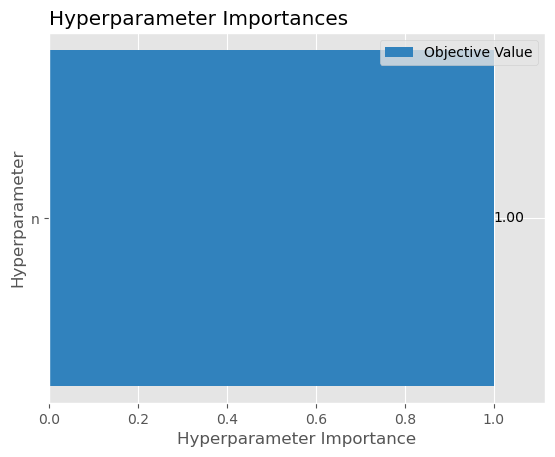

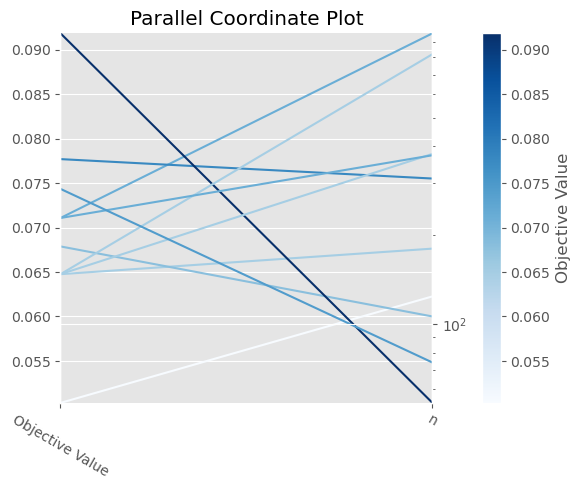

In [57]:
# Вызываем функцию optimize, которая принимает на вход функцию objective, которая задает целевую функцию для оптимизации,
# и параметр n, который задает количество испытаний для оптимизации
# 10 - это количество испытаний, которые мы хотим провести для оптимизации параметров модели обнаружения аномалий.
# Каждое испытание выбирает случайные значения для параметров модели из заданных диапазонов или списков с помощью
# методов suggest_int, suggest_categorical и suggest_float. Затем оно обучает модель на обучающей выборке и вычисляет
# значение целевой функции, которая равна средней точности (average precision score) на обучающей выборке.
# Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота
# (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
# После проведения всех испытаний мы можем увидеть лучшие параметры и лучшее значение целевой функции,
# которые были найдены в процессе оптимизации, а также два графика, которые показывают важность параметров
# и параллельные координаты. Важность параметров показывает, насколько каждый параметр влияет на значение целевой функции,
# а параллельные координаты показывают, как параметры и значение целевой функции меняются в разных испытаниях.
# Эти графики помогут нам понять, какие параметры лучше всего подходят для нашей модели.
optimize(objective, 10)

**Вывод**
- Наша модель достигла наивысшего значения метрики average_precision_score, которая измеряет качество обнаружения аномалий. 
Параметры меняются с обновлением:
Лучшие параметры - это {'n': }, что означает, что изолирующий лес состоит из n деревьев.
- Лучшее значение - это 0.09, что означает, что средняя точность по кривой точность-полнота составляет примерно n %. Это довольно низкое значение, что может свидетельствовать о том, что  данные сложны для обнаружения аномалий или что нужно попробовать другой метод или другие параметры.

### HBOS

- HBOS - это сокращение от Histogram-based Outlier Score, что означает оценка аномалий на основе гистограмм.
- Это эффективный метод обнаружения аномалий без учителя. Он предполагает, что признаки независимы и вычисляет степень выброса, построив гистограммы для каждого признака. Этот методреализован в библиотеке PyOD.

In [58]:
# импортируем модуль pyod.models.hbos, который содержит класс HBOS для обнаружения аномалий с помощью гистограмм
# HBOS - это сокращение от Histogram-based Outlier Score, что означает оценка аномалий на основе гистограмм
# Это эффективный метод обнаружения аномалий без учителя, который работает быстрее, чем многомерные методы, но менее точно

from pyod.models.hbos import HBOS

In [59]:
# задаем нормализованные данные X_norm и метки y, которые хотим разделить

# вызываем функцию get_data_part с аргументами X_norm, y и size
# X_norm - это двумерный массив с данными
# y - это одномерный массив с метками, где 0 - нормальное значение, а 1 - аномальное
# size - это доля данных, которая будет использована для обучающей выборки
# функция возвращает три значения: X_train, y_train и contamination
# X_train - это двумерный массив с обучающими данными
# y_train - это одномерный массив с обучающими метками
# contamination - это доля аномалий в обучающей выборке
X_train, y_train, contamination = get_data_part(X_norm, y, size=0.3)

train size: 85442
contamination: 0.002 (0.2%)


- Размер выборки 85442
- доля аномаоий 0.002

In [60]:
# определяем функцию objective, которая принимает аргумент trial
def objective(trial):
    # создаем объект класса HBOS, который использует алгоритм обнаружения аномалий на основе гистограмм
    # contamination - это доля аномалий в данных, которая задается заранее
    # n_bins - это количество бинов для построения гистограмм, 'auto' означает, что оно будет определено автоматически
    # alpha - это параметр, который контролирует ширину бинов, чем больше alpha, тем меньше бинов
    # tol - это параметр, который контролирует порог для определения аномалий, чем больше tol, тем больше аномалий
    # alpha и tol подбираются с помощью метода suggest_float, который возвращает случайное вещественное число
    # из заданного интервала
    # параметр log=True означает, что значения выбираются из логарифмического пространства
    clf = HBOS(
        contamination=contamination,
        n_bins='auto',
        alpha=trial.suggest_float('alpha', 0.05, 0.2),
        tol=trial.suggest_float('tol', 0.05, 0.9, log=True)
    )
    # обучаем модель на обучающих данных X_train
    clf.fit(X_train)
    # получаем предсказанные метки для обучающих данных
    y_pred = clf.labels_
    # возвращаем значение метрики average_precision_score, которая вычисляет среднюю точность по кривой точность-полнота
    # метрика принимает истинные метки y_train и предсказанные метки y_pred

    return average_precision_score(y_train, y_pred)


[I 2023-11-28 18:16:05,591] A new study created in memory with name: no-name-d9a8cbce-9c1c-4362-9bc8-e1eb95c8d975


  0%|          | 0/12 [00:00<?, ?it/s]

[I 2023-11-28 18:16:35,517] Trial 0 finished with value: 0.09555072988834724 and parameters: {'alpha': 0.11484054223222596, 'tol': 0.07779191339622021}. Best is trial 0 with value: 0.09555072988834724.
[I 2023-11-28 18:17:05,017] Trial 1 finished with value: 0.09555072988834724 and parameters: {'alpha': 0.12811355194835677, 'tol': 0.052858931711638545}. Best is trial 0 with value: 0.09555072988834724.
[I 2023-11-28 18:17:34,531] Trial 2 finished with value: 0.09555072988834724 and parameters: {'alpha': 0.13302178985712837, 'tol': 0.07764779653597512}. Best is trial 0 with value: 0.09555072988834724.
[I 2023-11-28 18:18:04,195] Trial 3 finished with value: 0.09182728942183711 and parameters: {'alpha': 0.1445249035677716, 'tol': 0.07078020332876866}. Best is trial 0 with value: 0.09555072988834724.
[I 2023-11-28 18:18:34,005] Trial 4 finished with value: 0.09555072988834724 and parameters: {'alpha': 0.1325892737716778, 'tol': 0.8552679302583667}. Best is trial 0 with value: 0.09555072988

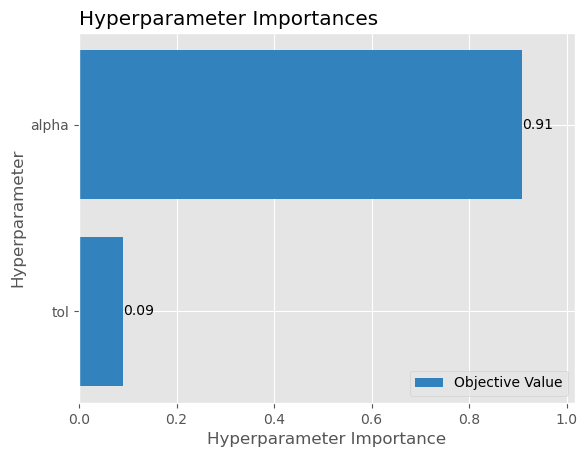

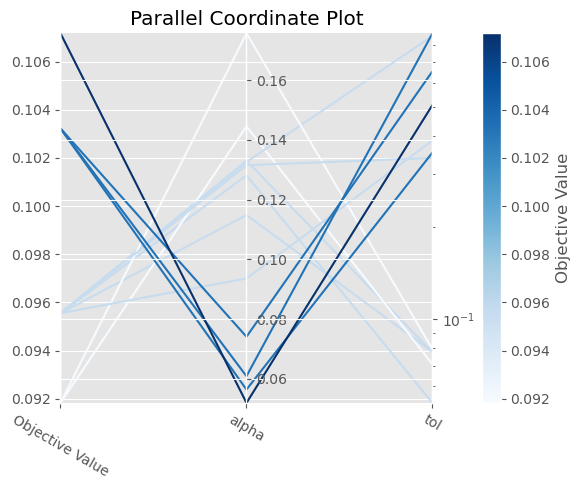

In [61]:
# Вызываем функцию optimize, которая принимает на вход функцию objective, которая задает целевую функцию для оптимизации,
# и параметр n, который задает количество испытаний для оптимизации
# 12 - это количество испытаний, которые мы хотим провести для оптимизации параметров модели обнаружения аномалий.
# Каждое испытание выбирает случайные значения для параметров модели из заданных диапазонов или списков с помощью
# методов suggest_int, suggest_categorical и suggest_float. Затем оно обучает модель на обучающей выборке и вычисляет
# значение целевой функции, которая равна средней точности (average precision score) на обучающей выборке.
# Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота
# (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
# После проведения всех испытаний мы можем увидеть лучшие параметры и лучшее значение целевой функции,
# которые были найдены в процессе оптимизации, а также два графика, которые показывают важность параметров
# и параллельные координаты. Важность параметров показывает, насколько каждый параметр влияет на значение целевой функции,
# а параллельные координаты показывают, как параметры и значение целевой функции меняются в разных испытаниях.
# Эти графики помогут нам понять, какие параметры лучше всего подходят для нашей модели.

optimize(objective, 12)

**Вывод **
Параметры меняются с обновлением:
- Лучшие параметры для модели HBOS.
наша модель достигла наивысшего значения метрики average_precision_score, которая измеряет качество обнаружения аномалий. - - Лучшие параметры - это {'alpha': 0.051, 'tol': 0.50}, что означает, что гистограмма имеет ширину бинов 0.0511 и порог для определения аномалий 0.50.
- Лучшее значение - это 0.107, что означает, что средняя точность по кривой точность-полнота составляет примерно 10.7%.
Это немного лучше, чем с моделью IForest, но все еще довольно низкое значение, что может свидетельствовать о том, что данные сложны для обнаружения аномалий или что нужно попробовать другой метод или другие параметры.

### Parameter-free models

Parameter-free models - это модели, которые не требуют никаких параметров, заданных пользователем, для выполнения обнаружения аномалий. Они также называются непараметрическими моделями, потому что они не предполагают никакого конкретного распределения для данных. Parameter-free models полезны, когда данные сложны, высокоразмерны или имеют неизвестные характеристики.
- Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions (ECOD): Эта модель использует эмпирическую кумулятивную функцию распределения (ECDF) каждого признака для измерения выброса каждой точки данных. ECDF - это доля точек данных, которые меньше или равны заданному значению. Модель вычисляет ECDF-оценку для каждой точки данных как произведение ECDF-значений всех признаков, а затем ранжирует точки данных по их ECDF-оценкам. Чем ниже ECDF-оценка, тем больше вероятность, что точка данных является аномальной.
- Rotation-based Outlier Detector (ROD): Эта модель использует метод, основанный на повороте, для преобразования данных в пространство меньшей размерности, где выбросы более заметны. Модель поворачивает данные так, чтобы максимизировать разницу между средними значениями нормальных и аномальных точек в каждом направлении. Затем модель вычисляет ROD-оценку для каждой точки данных как сумму квадратов расстояний от средних значений в каждом направлении. Чем выше ROD-оценка, тем больше вероятность, что точка данных является аномальной.
- Copula Based Outlier Detector (COPOD): Эта модель использует копулы для моделирования зависимости между признаками данных. Копула - это функция, которая связывает маргинальные распределения признаков в совместное распределение. Модель вычисляет COPOD-оценку для каждой точки данных как произведение верхней и нижней копулы, которые измеряют вероятность того, что точка данных превышает или меньше остальных точек по всем признакам. Чем выше COPOD-оценка, тем больше вероятность, что точка данных является аномальной.


In [62]:
from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.rod import ROD

In [63]:
# импортируем модуль pyod.models.ecod, который содержит класс ECOD для обнаружения аномалий с помощью эмпирических кумулятивных
# функций распределения
# ECOD - это сокращение от Empirical-Cumulative-distribution-based Outlier Detection, что означает оценка аномалий на
# основе эмпирических кумулятивных функций распределения
# Это эффективный метод обнаружения аномалий без учителя, который работает быстрее, чем многомерные методы, но менее точно.

from pyod.models.ecod import ECOD

# импортируем модуль pyod.models.copod, который содержит класс COPOD для обнаружения аномалий с помощью копул
# COPOD - это сокращение от Copula-Based Outlier Detection, что означает оценка аномалий на основе копул
# Это новый метод обнаружения аномалий без учителя, который вдохновлен статистическими методами для моделирования
# многомерного распределения данных

from pyod.models.copod import COPOD

# импортируем модуль pyod.models.rod, который содержит класс ROD для обнаружения аномалий с помощью метода, основанного
# на повороте
# ROD - это сокращение от Rotation-based Outlier Detector, что означает детектор аномалий, основанный на повороте
# Это еще один новый метод обнаружения аномалий без учителя, который использует технику поворота для преобразования
# данных в пространство меньшей размерности, где выбросы более заметны

from pyod.models.rod import ROD


In [64]:
# задаем нормализованные данные X_norm и метки y, которые хотим разделить

# вызываем функцию get_data_part с аргументами X_norm, y и size
# X_norm - это двумерный массив с данными
# y - это одномерный массив с метками, где 0 - нормальное значение, а 1 - аномальное
# size - это доля данных, которая будет использована для обучающей выборки
# функция возвращает три значения: X_train, y_train и contamination
# X_train - это двумерный массив с обучающими данными
# y_train - это одномерный массив с обучающими метками
# contamination - это доля аномалий в обучающей выборке
X_train, y_train, contamination = get_data_part(X_norm, y, size=0.8)

train size: 227845
contamination: 0.002 (0.2%)


- Размер выборки 227845
- доля аномаоий 0.002

<class 'pyod.models.ecod.ECOD'> ROC:0.6668, precision @ rank n:0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227454
           1       0.29      0.34      0.31       391

    accuracy                           1.00    227845
   macro avg       0.64      0.67      0.65    227845
weighted avg       1.00      1.00      1.00    227845

[[227129    325]
 [   260    131]]
CPU times: total: 6.42 s
Wall time: 21.5 s


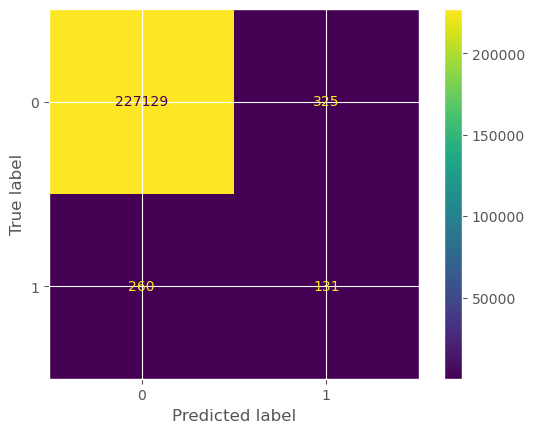

In [65]:
%%time
# Используем магическую команду %%time для измерения времени выполнения ячейки

# Создаем объект класса ECOD, который использует алгоритм обнаружения аномалий на основе эмпирических кумулятивных функций
# распределения
# contamination - это доля аномалий в данных, которая задается заранее
ecod = ECOD(contamination=contamination)
# Обучаем модель на обучающих данных X_train
ecod.fit(X_train)
# Вызываем функцию metrics, которая вычисляет и выводит различные метрики качества модели, такие как точность,
# полнота, F1-мера и AUC
# Функция принимает два аргумента: модель и истинные метки y_train
metrics(ecod, y_train)


**Вывод** , ниже описано как модель ECOD справилась с обнаружением аномалий на обучающих данных.
- ROC: это сокращение от Receiver Operating Characteristic, что означает характеристика работы приемника. Это кривая, которая показывает, как меняется соотношение между долей верно классифицированных аномалий (True Positive Rate) и долей неверно классифицированных нормальных точек (False Positive Rate) при изменении порога для определения аномалий. Чем выше ROC, тем лучше модель разделяет аномалии и нормальные точки. К сожалению, наша модель имеет ROC 0.6668, что означает, что она не очень хорошо справляется с этой задачей.
- Precision: это доля точек данных, которые модель правильно определила как аномальные, среди всех точек, которые модель определила как аномальные. Чем выше precision, тем меньше ложных срабатываний модели. Модель имеет precision 0.29, что означает, что из всех точек, которые модель пометила как аномальные, только 29% действительно являются аномальными.
- Recall: это доля точек данных, которые модель правильно определила как аномальные, среди всех аномальных точек в данных. Чем выше recall, тем меньше пропущенных аномалий моделью. Модель имеет recall 0.34, что означает, что из всех аномальных точек в данных, модель нашла только 34%.
- F1-score: это среднее гармоническое между precision и recall, которое учитывает их баланс. Чем выше F1-score, тем лучше модель согласовывает precision и recall. Модель имеет F1-score 0.31, что означает, что она не очень хорошо балансирует между precision и recall.
- Confusion matrix: это таблица, которая показывает, сколько точек данных было правильно или неправильно классифицировано моделью. Модель имеет confusion matrix [[227129    325]
 [   260    131]], что означает, что она правильно определила 227129 нормальных точек и 131 аномальную точку, но также ошибочно определила 325 нормальных точек как аномальные и пропустила 260 аномальных точек.

<class 'pyod.models.copod.COPOD'> ROC:0.6988, precision @ rank n:0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227454
           1       0.34      0.40      0.37       391

    accuracy                           1.00    227845
   macro avg       0.67      0.70      0.68    227845
weighted avg       1.00      1.00      1.00    227845

[[227154    300]
 [   235    156]]
CPU times: total: 4.45 s
Wall time: 4.49 s


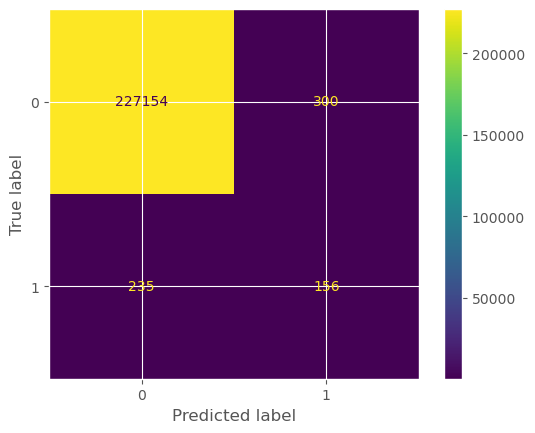

In [66]:
%%time
# Используем магическую команду %%time для измерения времени выполнения ячейки

# Создаем объект класса COPOD, который использует алгоритм обнаружения аномалий на основе копул
# contamination - это доля аномалий в данных, которая задается заранее
copod = COPOD(contamination=contamination)
# Обучаем модель на обучающих данных X_train
copod.fit(X_train)
# Вызываем функцию metrics, которая вычисляет и выводит различные метрики качества модели, такие как точность, полнота, F1-мера и AUC
# Функция принимает два аргумента: модель и истинные метки y_train
metrics(copod, y_train)


**Вывод** посмотрим как модель COPOD справилась с обнаружением аномалий на обучающих данных.

- ROC: Это кривая, которая показывает, как меняется соотношение между долей верно классифицированных аномалий (True Positive Rate) и долей неверно классифицированных нормальных точек (False Positive Rate) при изменении порога для определения аномалий. Чем выше ROC, тем лучше модель разделяет аномалии и нормальные точки. Модель имеет ROC 0.6988, что означает, что она лучше справляется с этой задачей, чем модель ECOD.
- Precision: это доля точек данных, которые модель правильно определила как аномальные, среди всех точек, которые модель определила как аномальные. Чем выше precision, тем меньше ложных срабатываний модели. Модель имеет precision 0.34, что означает, что из всех точек, которые модель пометила как аномальные, 34% действительно являются аномальными. Это немного лучше, чем у модели ECOD.
- Recall: это доля точек данных, которые модель правильно определила как аномальные, среди всех аномальных точек в данных. Чем выше recall, тем меньше пропущенных аномалий моделью. Модель имеет recall 0.40, что означает, что из всех аномальных точек в данных, модель нашла 40%. Это намного лучше, чем у модели ECOD.
- F1-score: это среднее гармоническое между precision и recall, которое учитывает их баланс. Чем выше F1-score, тем лучше модель согласовывает precision и recall. Модель имеет F1-score 0.37, что означает, что она лучше балансирует между precision и recall, чем модель ECOD.
- Confusion matrix: это таблица, которая показывает, сколько точек данных было правильно или неправильно классифицировано моделью. Ваша модель имеет confusion matrix [[227154    300]
 [   235    156]], что означает, что она правильно определила 227154 нормальных точек и 156 аномальных точек, но также ошибочно определила 300 нормальных точек как аномальные и пропустила 235 аномальных точек. Это лучше, чем у модели ECOD.

- Из этих метрик вы можете сделать вывод, что модель COPOD лучше справляется с обнаружением аномалий на обучающих данных, чем модель ECOD. Возможно, мы должны попробовать эту модель на тестовых данных или сравнить ее с другими моделями.

### ROD

ROD - это сокращение от Rotation-based Outlier Detection, что означает детектор аномалий, основанный на повороте. Это устойчивый и безпараметрический алгоритм, который не требует никаких предположений о статистическом распределении данных и работает интуитивно в трехмерном пространстве, где 3D-векторы, представляющие точки данных, поворачиваются вокруг геометрической медианы два раза против часовой стрелки с помощью формулы поворота Родрига. Результаты поворота - это параллелепипеды, чьи объемы математически анализируются как целевые функции и используются для вычисления медианного абсолютного отклонения, чтобы получить оценку выброса. Для высоких размерностей > 3 общая оценка вычисляется путем усреднения общих оценок 3D-подпространств, которые были получены в результате разложения исходного пространства данных.

In [44]:
# задаем нормализованные данные X_norm и метки y, которые хотим разделить

# вызываем функцию get_data_part с аргументами X_norm, y и size
# X_norm - это двумерный массив с данными
# y - это одномерный массив с метками, где 0 - нормальное значение, а 1 - аномальное
# size - это доля данных, которая будет использована для обучающей выборки
# функция возвращает три значения: X_train, y_train и contamination
# X_train - это двумерный массив с обучающими данными
# y_train - это одномерный массив с обучающими метками
# contamination - это доля аномалий в обучающей выборке
X_train, y_train, contamination = get_data_part(X_norm, y, size=0.3)

train size: 85442
contamination: 0.002 (0.2%)


- Размер выборки 85442
- доля аномаоий 0.002

In [45]:
# %%time
# rod = ROD(contamination=contamination)
# rod.fit(X_train)
# metrics(rod, y_train)

Внимание: ниже код работает очень долго.

In [ ]:
%%time
# Используем магическую команду %%time для измерения времени выполнения ячейки

# Создаем объект класса ROD, который использует алгоритм обнаружения аномалий на основе метода, основанного на повороте
# contamination - это доля аномалий в данных, которая задается заранее
rod = ROD(contamination=contamination)
# Обучаем модель на обучающих данных X_train
rod.fit(X_train)
# Вызываем функцию metrics, которая вычисляет и выводит различные метрики качества модели, такие как точность, полнота, F1-мера и AUC
# Функция принимает два аргумента: модель и истинные метки y_train
metrics(rod, y_train)

ROD работает слишком долго даже на 30% данных...

### Deep SVD

Deep SVD - это сокращение от Deep Singular Value Decomposition, что означает глубокое сингулярное разложение. Это метод для построения нейронной сети, которая может аппроксимировать матрицу рейтингов пользователей и объектов с помощью трех матриц: U, Σ и V^T. Этот метод основан на классическом алгоритме сингулярного разложения (SVD), который разбивает матрицу на три матрицы, такие что A = U Σ V^T, где U и V - это ортогональные матрицы, а Σ - это диагональная матрица с сингулярными значениями. Deep SVD использует нейронную сеть для обучения матриц U и V, а также для оптимизации сингулярных значений в Σ. Это позволяет учитывать нелинейные зависимости между пользователями и объектами, а также уменьшать размерность пространства признаков. Deep SVD может быть использован для решения задачи рекомендательных систем, то есть предсказания рейтингов пользователей для объектов, которые они еще не оценили. 
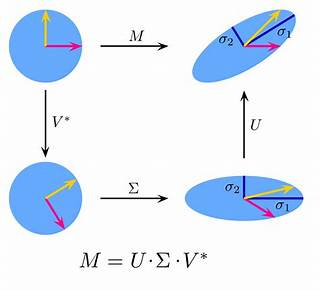![image.png](attachment:image.png)

In [67]:
%pip install tensorflow
# обычная установка

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:

# pip install --upgrade tensorflow # или обновление, если нужно


In [69]:
import tensorflow as tf
print(tf.__version__)



2.15.0


In [70]:
# импортируем модуль pyod.models.deep_svdd, который содержит класс DeepSVDD для обнаружения аномалий с помощью
# глубокого одноклассового метода
# DeepSVDD - это сокращение от Deep Support Vector Data Description, что означает глубокое описание данных
# с помощью опорных векторов
# Это метод для обучения нейронной сети, которая отображает данные в пространство, где они ограничены гиперсферой
# с центром c и радиусом R
# Метод минимизирует объем гиперсферы, заставляя сеть извлекать общие факторы вариации в данных
# Метод может быть использован для обнаружения аномалий, вычисляя расстояние от центра гиперсферы до каждой точки данных
# Чем больше расстояние, тем больше вероятность, что точка данных является аномальной

from pyod.models.deep_svdd import DeepSVDD


In [71]:
# задаем нормализованные данные X_norm и метки y, которые хотим разделить

# вызываем функцию get_data_part с аргументами X_norm, y и size
# X_norm - это двумерный массив с данными
# y - это одномерный массив с метками, где 0 - нормальное значение, а 1 - аномальное
# size - это доля данных, которая будет использована для обучающей выборки
# функция возвращает три значения: X_train, y_train и contamination
# X_train - это двумерный массив с обучающими данными
# y_train - это одномерный массив с обучающими метками
# contamination - это доля аномалий в обучающей выборке

X_train, y_train, contamination = get_data_part(X_norm, y, size=0.1)

train size: 28480
contamination: 0.002 (0.2%)


- Размер выборки 28480
- доля аномаоий 0.002

In [72]:
# определяем функцию цели для оптимизации гиперпараметров с помощью optuna
def objective(trial):
    # получаем количество нейронов во входном слое по размеру обучающих данных
    neurons = X_train.shape[1]
    # создаем объект класса DeepSVDD, который использует алгоритм обнаружения аномалий на основе глубокого одноклассового метода
    # random_state - это параметр для воспроизводимости результатов
    # contamination - это доля аномалий в данных, которая задается заранее
    # verbose - это параметр для управления выводом информации во время обучения
    # hidden_neurons - это список, содержащий количество нейронов в скрытых слоях сети
    # use_ae - это булевый параметр, который определяет, использовать ли автоэнкодер для инициализации весов сети
    # epochs - это количество эпох для обучения сети
    # dropout_rate - это параметр для регуляризации сети, который определяет долю нейронов, которые отключаются во время обучения
    # l2_regularizer - это параметр для регуляризации сети, который определяет коэффициент L2-штрафа для весов сети
    # все эти параметры, кроме random_state и contamination, являются гиперпараметрами, которые мы хотим оптимизировать с помощью optuna
    # для этого мы используем различные методы trial.suggest_*, которые позволяют выбирать значения из заданного диапазона или списка
    # например, trial.suggest_categorical выбирает значение из списка категориальных значений
    # trial.suggest_int выбирает целочисленное значение из заданного диапазона с заданным шагом
    # trial.suggest_float выбирает вещественное значение из заданного диапазона с возможностью использовать логарифмическую шкалу
    clf = DeepSVDD(
        random_state=0,
        contamination=contamination,
        verbose=0,
        hidden_neurons=[neurons, round(neurons / 2)],
        use_ae=trial.suggest_categorical('use_ae', [True, False]),
        epochs=trial.suggest_int('epochs', 100, 300),
        dropout_rate=trial.suggest_float('dropout', 0.05, 0.5, log=True),
        l2_regularizer=trial.suggest_float('l2', 0.05, 0.5, log=True)
    )
    # обучаем модель на обучающих данных X_train
    clf.fit(X_train)
    # получаем метки аномалий для тестовых данных X_test
    y_pred = clf.labels_
    # возвращаем среднюю точность (average precision score) как метрику качества модели
    # средняя точность - это взвешенное среднее точностей, достигнутых при различных порогах, с увеличением полноты от предыдущего порога, используемого в качестве веса
    # средняя точность лежит в диапазоне от 0 до 1, чем выше, тем лучше
    return average_precision_score(y_train, y_pred)


In [73]:
def objective(trial):
    neurons = X_train.shape[1]
    clf = DeepSVDD(
        random_state=0,
        contamination=contamination,
        verbose=0,
        hidden_neurons=[neurons, round(neurons / 2)],
        use_ae=trial.suggest_categorical('use_ae', [True, False]),
        epochs=trial.suggest_int('epochs', 100, 300),
        dropout_rate=trial.suggest_float('dropout', 0.05, 0.5, log=True),
        l2_regularizer=trial.suggest_float('l2', 0.05, 0.5, log=True)
    )
    clf.fit(X_train)
    y_pred = clf.labels_
    return average_precision_score(y_train, y_pred)

[I 2023-11-28 18:24:45,033] A new study created in memory with name: no-name-8bf68dfd-6cbe-4ed8-98a4-0557387f503e


  0%|          | 0/20 [00:00<?, ?it/s]




890/890 [==============================] - 2s 2ms/step
[I 2023-11-28 18:30:32,882] Trial 0 finished with value: 0.010215099739876238 and parameters: {'use_ae': True, 'epochs': 208, 'dropout': 0.18524075561019535, 'l2': 0.16850550415897472}. Best is trial 0 with value: 0.010215099739876238.
890/890 [==============================] - 2s 2ms/step
[I 2023-11-28 18:35:29,447] Trial 1 finished with value: 0.3529203168060049 and parameters: {'use_ae': True, 'epochs': 177, 'dropout': 0.23317368094813337, 'l2': 0.20362743595234817}. Best is trial 1 with value: 0.3529203168060049.
890/890 [==============================] - 2s 2ms/step
[I 2023-11-28 18:41:10,438] Trial 2 finished with value: 0.4219584265797784 and parameters: {'use_ae': True, 'epochs': 204, 'dropout': 0.05209764557470257, 'l2': 0.10575928914196499}. Best is trial 2 with value: 0.4219584265797784.
890/890 [==============================] - 2s 2ms/step
[I 2023-11-28 18:45:12,721] Trial 3 finished with value: 0.5786104975205142 a

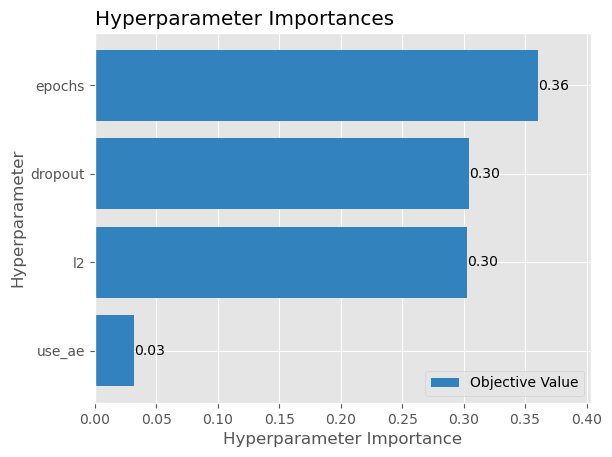

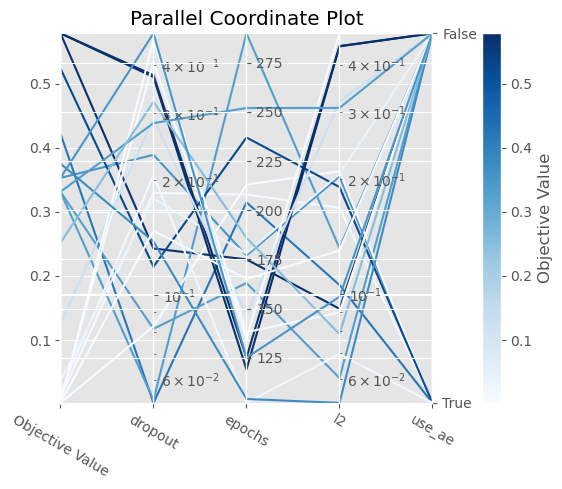

In [74]:
# Вызываем функцию optimize, которая принимает на вход функцию objective, которая задает целевую функцию для оптимизации,
# и параметр n, который задает количество испытаний для оптимизации
# 20 - это количество испытаний, которые мы хотим провести для оптимизации параметров модели обнаружения аномалий.
# Каждое испытание выбирает случайные значения для параметров модели из заданных диапазонов или списков с помощью
# методов suggest_int, suggest_categorical и suggest_float. Затем оно обучает модель на обучающей выборке и вычисляет
# значение целевой функции, которая равна средней точности (average precision score) на обучающей выборке.
# Средняя точность - это метрика качества обнаружения аномалий, которая вычисляется как площадь под кривой точность-полнота
# (precision-recall curve). Чем выше средняя точность, тем лучше модель обнаруживает аномалии.
# После проведения всех испытаний мы можем увидеть лучшие параметры и лучшее значение целевой функции,
# которые были найдены в процессе оптимизации, а также два графика, которые показывают важность параметров
# и параллельные координаты. Важность параметров показывает, насколько каждый параметр влияет на значение целевой функции,
# а параллельные координаты показывают, как параметры и значение целевой функции меняются в разных испытаниях.
# Эти графики помогут нам понять, какие параметры лучше всего подходят для нашей модели.

optimize(objective, 20)

Параметры могут менятся:
Best params:{'use_ae': False, 'epochs': 175, 'dropout':0.13240843290940185, 'l2': 0.09164054973288507}
Best value:0.5786104975205142
Вот наши оптимальные параметры для модели Deep SVD, которая является одним из алгоритмов библиотеки PyOD.
Пояснения:
- use_ae - это булевый параметр, который определяет, использовать ли автоэнкодер для инициализации весов сети. Автоэнкодер - это нейронная сеть, которая учится сжимать и восстанавливать данные. Если use_ae равен False, то веса сети инициализируются случайным образом. В вашем случае use_ae равен False, что означает, что мы не используем автоэнкодер.
- epochs - это количество эпох для обучения сети. Эпоха - это один проход по всем обучающим данным. Чем больше эпох, тем больше возможность сети научиться выделять аномалии. Однако слишком большое количество эпох может привести к переобучению, когда сеть запоминает обучающие данные и теряет способность обобщать на новых данных. В вашем случае epochs равен 175, что означает, что мы обучаем сеть 175 раз на обучающих данных.
- dropout_rate - это параметр для регуляризации сети, который определяет долю нейронов, которые отключаются во время обучения. Регуляризация - это способ предотвратить переобучение, когда сеть становится слишком сложной и подстраивается под шум в данных. Dropout - это один из методов регуляризации, который случайным образом исключает некоторые нейроны из сети, заставляя ее учиться более устойчивым и разнообразным представлениям данных. В вашем случае dropout_rate равен 0.13, что означает, что мы отключим примерно 13% нейронов в каждом слое сети во время обучения.
- l2_regularizer - это параметр для регуляризации сети, который определяет коэффициент L2-штрафа для весов сети. L2-штраф - это еще один метод регуляризации, который добавляет к функции потерь сети дополнительный член, пропорциональный квадрату нормы весов сети. Это заставляет сеть уменьшать величину весов и предотвращать их слишком большое возрастание. В вашем случае l2_regularizer равен 0.09, что означает, что вы накладываете средний L2-штраф на веса сети.

- Best value - это метрика качества модели, которую мы выбралиранееи для оптимизации параметров. В вашем случае использована средняя точность (average precision score) как метрика качества модели.
Средняя точность - это взвешенное среднее точностей, достигнутых при различных порогах, с увеличением полноты от предыдущего порога, используемого в качестве веса. Средняя точность лежит в диапазоне от 0 до 1, чем выше, тем лучше. В нашем случае best value равен 0.57, что означает, что мы достигли средней точности около 50%.

**Вывод**

У меня возник вопрос - какие параметры лучше для обнаружения выбросов в данных:
Deep SVD, ECOD или COPOD. Я думаю, это зависит от многих факторов, таких как тип и размер данных, степень зашумленности, желаемая скорость и точность и т.д.
Я только могу предположить, некоторые критерии для сравнения этих алгоритмов.

- Deep SVD - это алгоритм, основанный на глубоком одноклассовом методе опорных векторов, который использует нейронную сеть для обучения и предсказания. Он требует библиотеку TensorFlow и имеет много гиперпараметров, которые нужно настраивать. Он может давать хорошие результаты на сложных и высокоразмерных данных, но также может быть подвержен переобучению и требовать больше времени и ресурсов для обучения и инференса.
Инференс - это процесс применения модели искусственного интеллекта (ИИ) к новым данным для получения предсказаний или решений.  Инференс отличается от обучения модели ИИ, которое заключается в настройке параметров модели на основе обучающих данных. Инференс обычно требует меньше вычислительных ресурсов, чем обучение, но все же может быть сложной и затратной задачей, особенно для больших и сложных моделей ИИ.
- ECOD - это ансамбль для обнаружения выбросов на основе кластеризации, который использует несколько базовых детекторов, таких как K-Means, DBSCAN и OPTICS, для разбиения данных на кластеры и вычисления степени аномальности каждого кластера. Он не требует библиотеку TensorFlow и имеет меньше гиперпараметров, которые нужно настраивать. Он может давать хорошие результаты на средних и низкоразмерных данных, но также может быть чувствителен к выбору базовых детекторов и параметров кластеризации.
- COPOD - это корреляционный метод обнаружения выбросов, который использует статистические свойства данных, такие как эмпирическая копула и скошенность, для оценки вероятности попадания каждого наблюдения в хвосты распределения. Он не требует библиотеку TensorFlow и не имеет гиперпараметров, которые нужно настраивать. Он может давать хорошие результаты на больших и разнородных данных, но также может быть нестабилен при наличии сильных выбросов или неоднородных распределений.

В зависимости от наших целей и ограничений, мы можете выбрать тот алгоритм, который лучше подходит для задачи.

Мы также можем сравнить их по различным метрикам качества, таким как средняя точность, ROC-кривая, F1-мера.

Спасибо за внимание!